# Stochastic Gradient Descent vs Batch Gradient Descent 

Gradient Decent is an optimization algorithm that often use to train nural network & machine learning 

It works by finding the best weight and biase for a model by minimizing the error between preidicted & actual value

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [6]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [7]:
x_scaled = sx.fit_transform(df.drop('price',axis='columns'))
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
def gradient_decent(x,y_true,epoch,learning_rate =0.01):
    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0 #-------> intializing with 0 & 1

    total_sample = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epoch):
        y_predict = np.dot(w,x_scaled.T) + b

        # Finding the derivative
        w_gard = -(2/total_sample)*(x.T.dot(y_true-y_predict))
        b_gard = -(2/total_sample)*np.sum(y_true-y_predict)

        w = w - learning_rate * w_gard
        b = b- learning_rate * b_gard

        cost = np.mean(np.square(y_true - y_predict))

    if i%10==0:
        cost_list.append(cost)
        epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = gradient_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

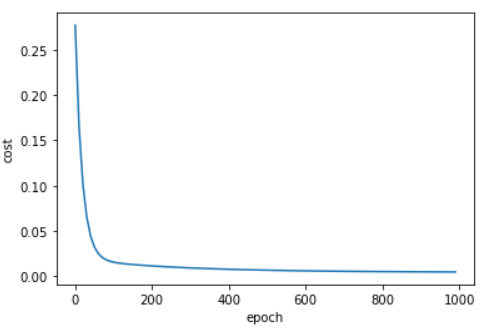

In [10]:
def predict(x,y,w,b):

    scaled_x = sx.transform([[x, y]])[0]  # the user inputs should be conerted in range of  0 to 1

    predicted = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b

    return sy.inverse_transform([[predicted]])[0][0]

In [11]:
predict(1056,2,w,b)

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


32.0964952553193

In [12]:
predict(2600,4,w,b)


C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

# (2) Stochastic Gradient Descent Implementation

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [13]:
import random
def SGD(x, y_true, epoch, learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0  # Initializing with 0

    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epoch):
        random_index = random.randint(0, total_samples - 1)  # random index from total samples
        sample_x = x[random_index]
        sample_y = y_true[random_index]

        # Prediction
        y_predict = np.dot(w, sample_x) + b

        # Finding the derivative
        w_grad = -(2 / total_samples) * (sample_x.T * (sample_y - y_predict))
        b_grad = -(2 / total_samples) * (sample_y - y_predict)

        # Updating weights and bias
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Cost calculation
        cost = np.mean(np.square(y_true - (np.dot(x, w) + b)))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

# Example usage
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 1000)
print(w_sgd, b_sgd, cost_sgd)

[0.86940668 0.84302677] -0.25068651133322556 0.03366290489114773


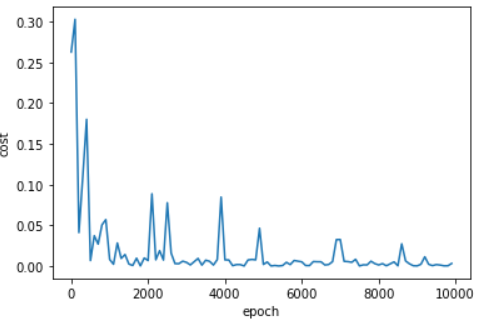

In [14]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


34.703950262369084

# Minibatch Gradient Descent 

Minibatch Gradient Descent operates by dividing the dataset into small batches, called minibatches, and computes the gradient of the loss function for each minibatch. The model parameters are then updated based on the average gradient from these minibatches. This approach combines the advantages of both batch and stochastic gradient descent

In [15]:
arr=[1,2,3,4,5,6,7,8,9,9,1,21,31,41,12,15,16,15,67,45]
l=len(arr)
batch =5
for i in range(0,l,batch):
    print(arr[i:i+batch])

[1, 2, 3, 4, 5]
[6, 7, 8, 9, 9]
[1, 21, 31, 41, 12]
[15, 16, 15, 67, 45]


In [17]:
permutation = np.random.permutation(10)
permutation

array([3, 8, 2, 1, 9, 4, 6, 0, 5, 7])

In [19]:
def min_gradient_decent(x,y_true,epoch,learning_rate =0.01,batch_size = 32):
    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0 #-------> intializing with 0 & 1

    total_sample = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epoch):
        indices = np.random.permutation(total_sample)
        x_shuffled  = x[indices]
        y_shuffled  = y_true[indices]

        for i in range(0,total_sample,batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            y_predict = np.dot(w,x_batch.T) + b
    
            # Finding the derivative
            w_gard = -(2/total_sample)*(x_batch.T.dot(y_batch-y_predict))
            b_gard = -(2/total_sample)*np.sum(y_batch-y_predict)
    
            w = w - learning_rate * w_gard
            b = b- learning_rate * b_gard
    
            cost = np.mean(np.square(y_batch - y_predict))
    
            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_min, b_min, cost_min, cost_list_min, epoch_list_min = min_gradient_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w_min, b_min, cost_min

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.006864189042980809)

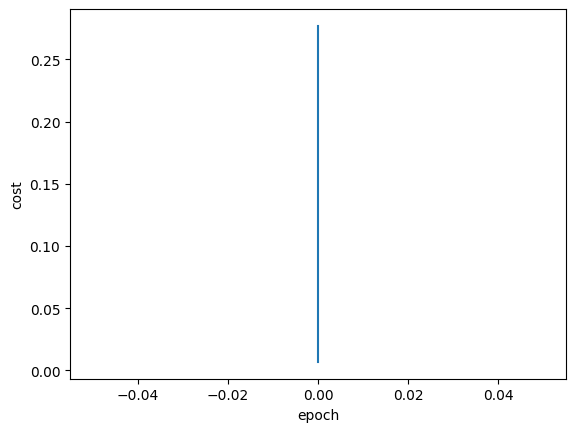

In [25]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_min,cost_list_min)

In [20]:
predict(1000,2,w_min, b_min)

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [22]:
predict(2600,4,w_min, b_min)

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [26]:
predict(1500,3,w_min, b_min)

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694